### 1.Import numpy and pandas and load data file named 'test_Y3wMUE5_7gLdaTN.csv' as test



In [1]:
import numpy as np
import pandas as pd
df=pd.DataFrame(pd.read_csv('test_Y3wMUE5_7gLdaTN.csv'))

### 2.Print list of column names


In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban


### 3.Types of data columns


In [19]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### 4.Summary statistics


In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,60.946040,64.620366,0.364778
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### DATA CLEANING AND PREPROCESSING

### 5.Find missing values

In [21]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
362,False,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,False,False
365,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### 6.Impute missing values with mean (numerical variables)


In [23]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [24]:
df['LoanAmount'].fillna(inplace=True,value=df['LoanAmount'].mean())
df['Loan_Amount_Term'].fillna(inplace=True,value=df['Loan_Amount_Term'].mean())
df['Credit_History'].fillna(inplace=True,value=df['Credit_History'].mean())

### 7.Impute missing values with mode (categorical variables)


In [25]:
pd.get_dummies(df['Gender'],drop_first=True)
pd.get_dummies(df['Self_Employed'],drop_first=True)

,Yes
0,0
1,0
2,0
3,0
4,0
...,...
362,1
363,0
364,0
365,0


In [26]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [27]:
df['Gender'].mode()[0]

'Male'

In [28]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### 8.Remove irrelevant columns Loan_ID variable - Irrelevant from test and train data



In [32]:
df.drop('Loan_ID',axis=1, inplace=True)

### 9.Build dummy variables for categorical variables



In [33]:
pd.get_dummies(df['Gender'],drop_first=True)
pd.get_dummies(df['Self_Employed'],drop_first=True)
pd.get_dummies(df['Dependents'],drop_first=True)

,1,2,3+
0,0,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,0
...,...,...,...
362,0,0,1
363,0,0,0
364,0,0,0
365,0,0,0


### 10.Get x as columns of ApplicantIncome and Credit_History


In [56]:
X = df.iloc[:,[5,9]].values

In [57]:
X

array([[5.72000000e+03, 1.00000000e+00],
       [3.07600000e+03, 1.00000000e+00],
       [5.00000000e+03, 1.00000000e+00],
       [2.34000000e+03, 8.25443787e-01],
       [3.27600000e+03, 1.00000000e+00],
       [2.16500000e+03, 1.00000000e+00],
       [2.22600000e+03, 1.00000000e+00],
       [3.88100000e+03, 0.00000000e+00],
       [1.36330000e+04, 1.00000000e+00],
       [2.40000000e+03, 1.00000000e+00],
       [3.09100000e+03, 1.00000000e+00],
       [2.18500000e+03, 1.00000000e+00],
       [4.16600000e+03, 8.25443787e-01],
       [1.21730000e+04, 0.00000000e+00],
       [4.66600000e+03, 1.00000000e+00],
       [5.66700000e+03, 1.00000000e+00],
       [4.58300000e+03, 1.00000000e+00],
       [3.78600000e+03, 1.00000000e+00],
       [9.22600000e+03, 1.00000000e+00],
       [1.30000000e+03, 1.00000000e+00],
       [1.88800000e+03, 1.00000000e+00],
       [2.08300000e+03, 1.00000000e+00],
       [3.90900000e+03, 1.00000000e+00],
       [3.76500000e+03, 1.00000000e+00],
       [5.400000

### 11.Import matplotlib and plot scatter between applicantincome and credit history

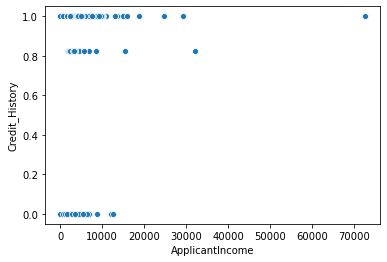

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(df['ApplicantIncome'],df['Credit_History'])

### 12.Elbow method to determine K and plot Elbow Method


In [59]:
from sklearn.cluster import KMeans
elb = []
for n in range(1,10):
    kme = KMeans(n_clusters=n)
    kme.fit(X)
    elb.append(kme.inertia_)

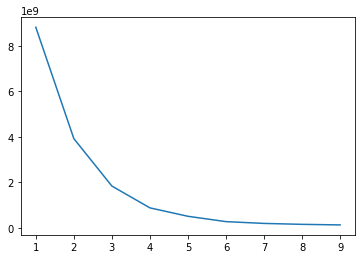

In [60]:
sns.lineplot(range(1,10),elb)

### 13.fit K_means with founded K



In [61]:
km = KMeans(n_clusters=4)
km.fit(X)
pred = km.predict(X)

### 14.show cluster results


In [62]:
sns

<module 'seaborn' from 'C:\\Users\\User\\Anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

### 15.print cluster centers


In [63]:
km.cluster_centers_

array([[3.52985668e+03, 8.09889559e-01],
       [7.25290000e+04, 1.00000000e+00],
       [2.62010000e+04, 9.56360947e-01],
       [9.13920000e+03, 8.99569661e-01]])

### 16.Lets plot those clusters!


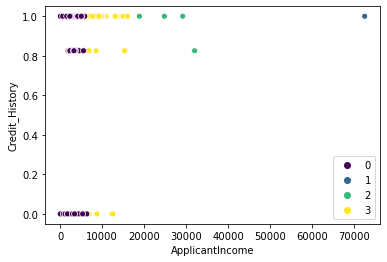

In [64]:
sns.scatterplot(df['ApplicantIncome'], df['Credit_History'], hue=pred, palette='viridis')

### 17.Create dendogram



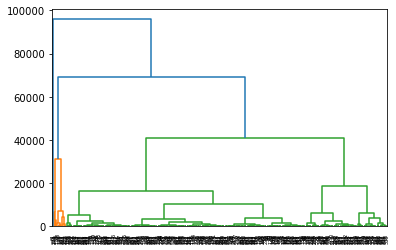

In [65]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) 

In [66]:
from sklearn.cluster import AgglomerativeClustering

### 18.Fit agglomerative hierarchical clustering



In [67]:
ac=AgglomerativeClustering(n_clusters=4)
preds=ac.fit_predict(X)

### 19.Lets plot those clusters!



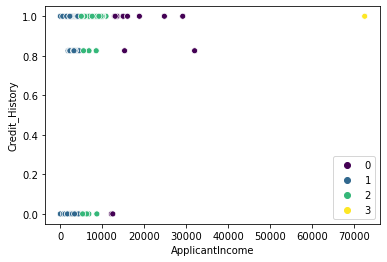

In [68]:
sns.scatterplot(df['ApplicantIncome'], df['Credit_History'], hue=preds, palette='viridis')

In [69]:
X

array([[5.72000000e+03, 1.00000000e+00],
       [3.07600000e+03, 1.00000000e+00],
       [5.00000000e+03, 1.00000000e+00],
       [2.34000000e+03, 8.25443787e-01],
       [3.27600000e+03, 1.00000000e+00],
       [2.16500000e+03, 1.00000000e+00],
       [2.22600000e+03, 1.00000000e+00],
       [3.88100000e+03, 0.00000000e+00],
       [1.36330000e+04, 1.00000000e+00],
       [2.40000000e+03, 1.00000000e+00],
       [3.09100000e+03, 1.00000000e+00],
       [2.18500000e+03, 1.00000000e+00],
       [4.16600000e+03, 8.25443787e-01],
       [1.21730000e+04, 0.00000000e+00],
       [4.66600000e+03, 1.00000000e+00],
       [5.66700000e+03, 1.00000000e+00],
       [4.58300000e+03, 1.00000000e+00],
       [3.78600000e+03, 1.00000000e+00],
       [9.22600000e+03, 1.00000000e+00],
       [1.30000000e+03, 1.00000000e+00],
       [1.88800000e+03, 1.00000000e+00],
       [2.08300000e+03, 1.00000000e+00],
       [3.90900000e+03, 1.00000000e+00],
       [3.76500000e+03, 1.00000000e+00],
       [5.400000

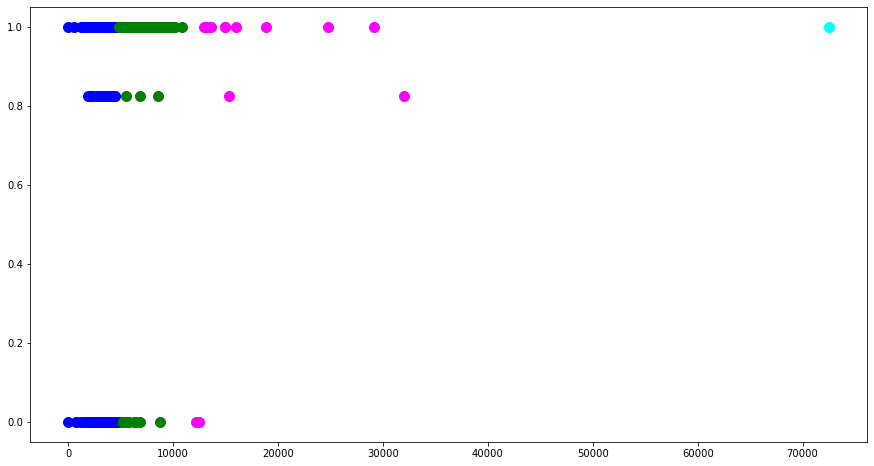

In [77]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[preds==0,0],X[preds==0,1],s=100,c='magenta')
plt.scatter(X[preds==1,0],X[preds==1,1],s=100,c='blue')
plt.scatter(X[preds==2,0],X[preds==2,1],s=100,c='green')
plt.scatter(X[preds==3,0],X[preds==3,1],s=100,c='cyan')


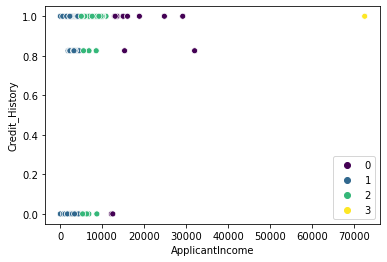

In [75]:
sns.scatterplot(df['ApplicantIncome'],df['Credit_History'], hue=preds, palette='viridis')